In [1]:
import pandas_datareader.data as pdr

def get_stock_data(code):
  df = pdr.DataReader("{}.JP".format(code), "stooq").sort_index()
  return df

In [2]:
!pip install mplfinance

     |████████████████████████████████| 70 kB 3.7 MB/s 


In [3]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz  
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr  
!make 
!make install  
!pip install Ta-Lib

--2022-05-12 17:03:21--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-05-12 17:03:21--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-05-12 17:03:21--  http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cfhcable.dl.s

In [4]:
import mplfinance as mpf
import datetime as dt
import talib as ta

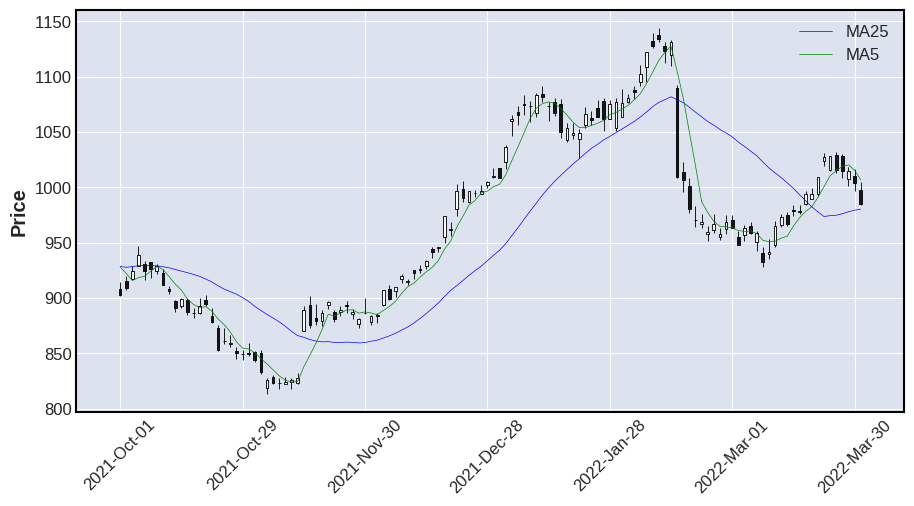

In [ ]:
df = get_stock_data(7182)   # ゆうちょ銀行
close = df["Close"]

# 25日移動平均線
df["ma25"]  = ta.SMA(close, 25)
# 5日移動平均線
df["ma5"]  = ta.SMA(close, 5)

# 2021.10.1から2022.3.31までのチャートを作成
cdf = df[dt.datetime(2021,10,1):dt.datetime(2022,3,31)]
apd  = [ 
        # 5日移動平均線
        mpf.make_addplot(cdf["ma25"], color="blue", width=0.5), 
        # 25日移動平均線
        mpf.make_addplot(cdf["ma5"], color="green", width=0.5)
      ]

# ラベルをつけてチャートを表示
fig, axes = mpf.plot(cdf, type="candle", figratio=(2,1), addplot=apd, returnfig=True)
axes[0].legend(["MA25", "MA5"])
fig.show()

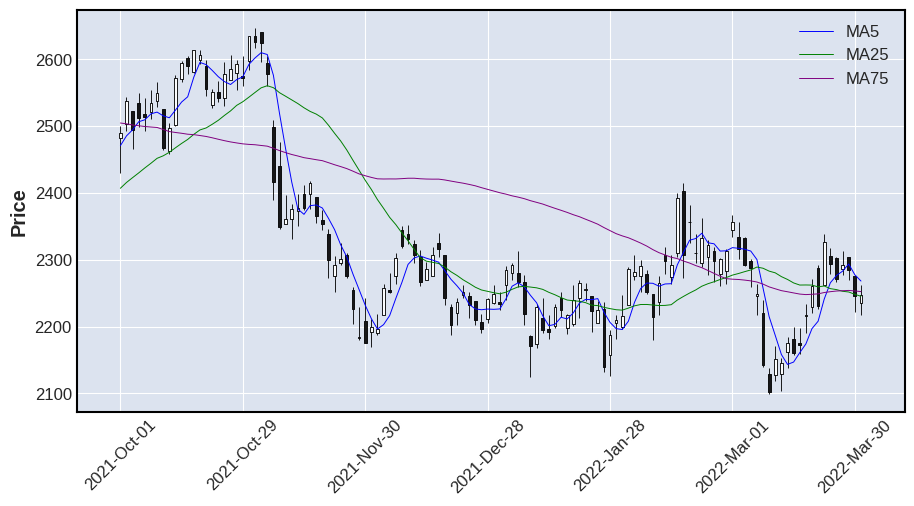

In [7]:
df = get_stock_data(9783)   # ベネッセホールディングス
close = df["Close"]

# 移動平均
df["ma5"]  = ta.SMA(close, 5)
df["ma25"]  = ta.SMA(close, 25)
df["ma75"]  = ta.SMA(close, 75)

# 2021.10.1から2022.3.31までのチャートを作成
cdf = df[dt.datetime(2021,10,1):dt.datetime(2022,3,31)]
apd  = [
          # 5日移動平均線
          mpf.make_addplot(cdf["ma5"], color="blue", panel=0, width=0.7),
          # 25日移動平均線
          mpf.make_addplot(cdf["ma25"], color="green", panel=0, width=0.7),
          # 75日移動平均線
          mpf.make_addplot(cdf["ma75"], color="purple", panel=0, width=0.7)
      ]

fig, axes = mpf.plot(cdf, type="candle", figratio=(2,1), addplot=apd, returnfig=True)
axes[0].legend(["MA5", "MA25", "MA75"])
fig.show()

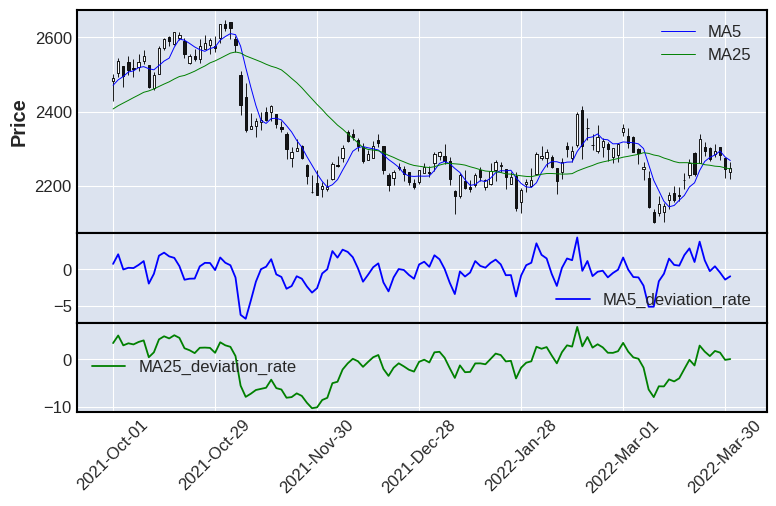

In [ ]:
df = get_stock_data(9783)   # ベネッセホールディングス
close = df["Close"]

# 移動平均
df["ma5"]  = ta.SMA(close, 5)
df["ma25"]  = ta.SMA(close, 25)

# 乖離率
df["ma5_deviation_rate"] = (close - df["ma5"]) / df["ma5"] * 100
df["ma25_deviation_rate"] = (close - df["ma25"]) / df["ma25"] * 100

# 2021.10.1から2022.3.31までのチャートを作成
cdf = df[dt.datetime(2021,10,1):dt.datetime(2022,3,31)]
apd  = [
          # 移動平均線
          mpf.make_addplot(cdf["ma5"], color="blue", panel=0, width=0.7),
          mpf.make_addplot(cdf["ma25"], color="green", panel=0, width=0.7),
           # 5日移動平均乖離率
          mpf.make_addplot(cdf["ma5_deviation_rate"], color="blue", panel=1),
          # 25日移動平均乖離率
          mpf.make_addplot(cdf["ma25_deviation_rate"], color="green", panel=2)
      ]

fig, axes = mpf.plot(cdf, type="candle", figratio=(5,3), addplot=apd, returnfig=True)
axes[0].legend(["MA5", "MA25"])
axes[2].legend(["MA5_deviation_rate"])
axes[4].legend(["MA25_deviation_rate"])
fig.show()

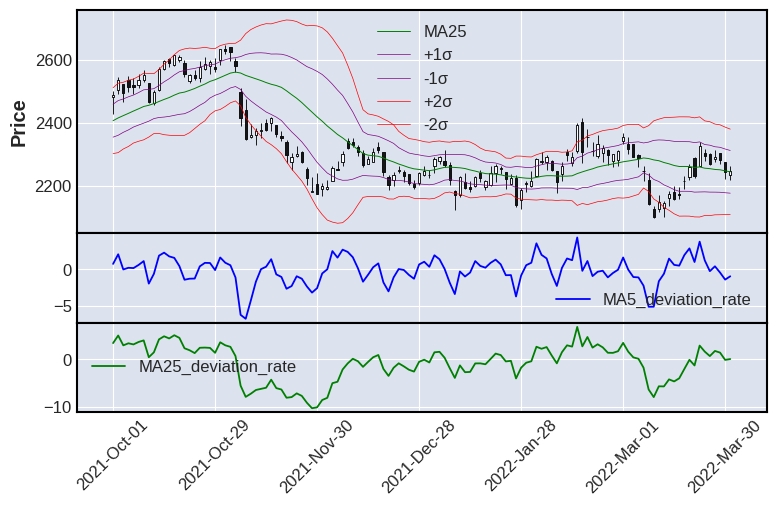

In [ ]:
df = get_stock_data(9783) 
close = df['Close']

df['ma5'] = close.rolling(window=5).mean()
df['ma25'] = close.rolling(window=25).mean()

# 乖離率
df['ma5_deviation_rate'] = (close - df['ma5']) / df['ma5'] * 100
df['ma25_deviation_rate'] = (close - df['ma25']) / df['ma25'] * 100

# ボリンジャーバンド　±1σ　±2σ
df["upper1"], _, df["lower1"] = ta.BBANDS(close, timeperiod=25, nbdevup=1, nbdevdn=1, matype=ta.MA_Type.SMA)
df["upper2"], _, df["lower2"] = ta.BBANDS(close, timeperiod=25, nbdevup=2, nbdevdn=2, matype=ta.MA_Type.SMA)

# 2021.10.1から2022.3.31までのチャートを作成
cdf = df[dt.datetime(2021,10,1):dt.datetime(2022,3,31)]
apd  = [
          # MA25
          mpf.make_addplot(cdf['ma25'], color='green', panel=0, width=0.7),
          # ボリンジャーバンド 
          mpf.make_addplot(cdf["upper1"], color="purple", width=0.5),
          mpf.make_addplot(cdf["lower1"], color="purple", width=0.5),
          mpf.make_addplot(cdf["upper2"], color="red", width=0.5), 
          mpf.make_addplot(cdf["lower2"], color="red", width=0.5),
          # 5日移動平均線乖離率
          mpf.make_addplot(cdf['ma5_deviation_rate'], color='blue', panel=1),
          # 25日移動平均線乖離率
          mpf.make_addplot(cdf['ma25_deviation_rate'], color='green', panel=2)
      ]

fig, axes = mpf.plot(cdf, type="candle", figratio=(5,3), addplot=apd, returnfig=True)
axes[0].legend(["MA25", "+1σ", "-1σ", "+2σ", "-2σ"])
axes[2].legend(["MA5_deviation_rate"])
axes[4].legend(["MA25_deviation_rate"])
fig.show()